01 - exploración.ipynb donde se muestra cómo cargas el archivo train.csv de la competencia y muestras alguna exploración de datos (por ejemplo, cuantos estudiantes hay de cada clase, por localidades, etc.). Esta exploración no tiene que ser exhaustiva, tan sólo que muestres que eres capaz de cargar los datos e inspeccionarlos.

## Descargar los datos desde kaggle

### Estas lineas solo se deben correr una vez

In [6]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

### De aqui ya se utiliza normalmente

In [8]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
# ESTE ES EL LINK QUE APARECE DEBAJO DEL DATASET DEL KAGGLE

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# COMIENZO PROYECTO

In [25]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CARGA DE DATOS

In [26]:
file_path = "/content/train.csv"  # Asegúrate de que este archivo exista en la ruta especificada
data_train = pd.read_csv(file_path, index_col="ID")
print("✅ Datos cargados correctamente")
data_train.head(3)

✅ Datos cargados correctamente


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


### Inspección General del DataFrame

In [29]:
# Mostrar dimensiones del dataset
print(f"Dimensiones del DataFrame: {data_train.shape[0]} filas, {data_train.shape[1]} columnas\n")

# Mostrar nombres de columnas
print("Columnas del DataFrame:")
print(data_train.columns.tolist(), "\n")

# Información general del dataset
print("Información General:")
data_train.info()

# Estadísticas descriptivas numéricas
print("\nEstadísticas Descriptivas:")
display(data_train.describe().T)  # Transpuesta para mejor lectura


Dimensiones del DataFrame: 692500 filas, 20 columnas

Columnas del DataFrame:
['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4'] 

Información General:
<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         692500 non-null  int64  
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  ob

,count,mean,std,min,25%,50%,75%,max
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


In [12]:
# Miramos datos faltantes
data_nan = data_train.isna().sum()
data_nan[data_nan!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


## Analisis de datos numericos

In [13]:
data_train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


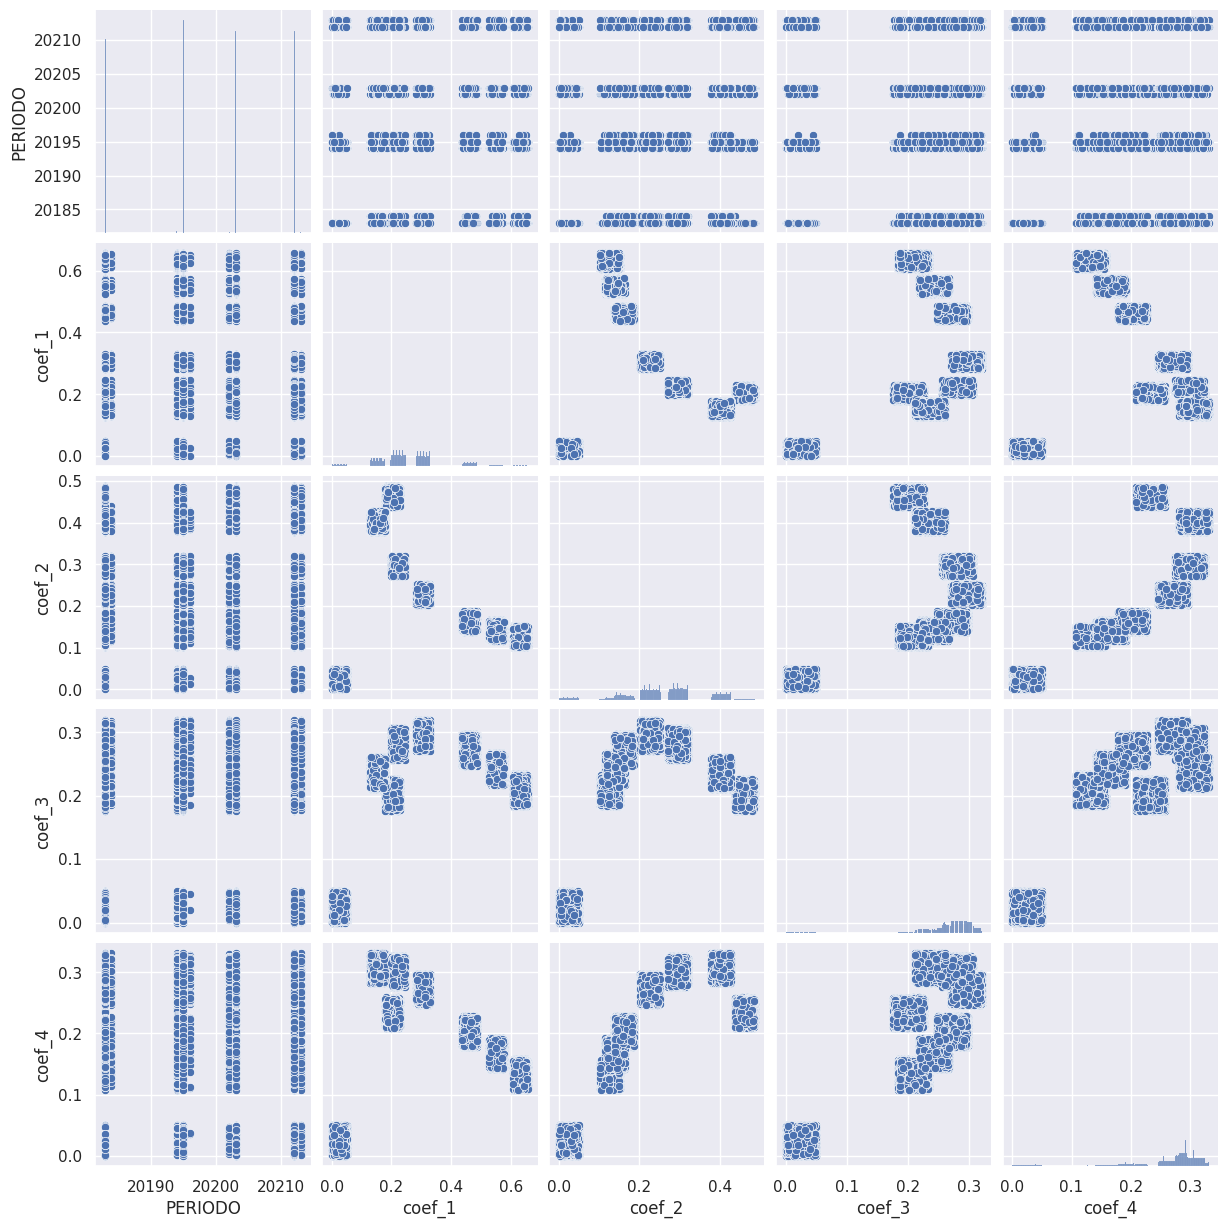

In [14]:
cols = ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']
sns.set()
sns.pairplot(data_train[cols], height=2.5)

375
coef_1
0.213    4848
0.228    4835
0.201    4821
0.224    4794
0.203    4790
         ... 
0.191      58
0.179      55
0.183      55
0.193      55
0.184      55
Name: count, Length: 375, dtype: int64


<Axes: >

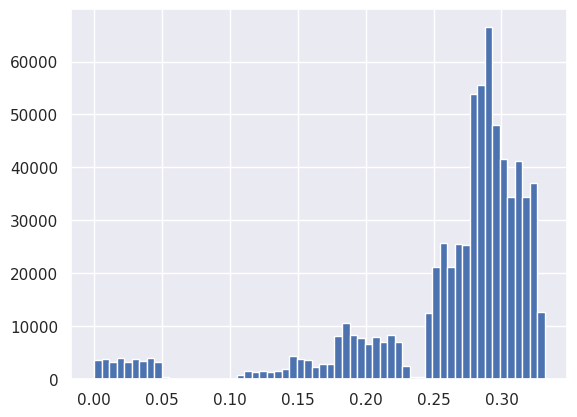

In [15]:
cof1=data_train['coef_1']
cof2=data_train['coef_2']
cof3=data_train['coef_3']
cof4=data_train['coef_4']
#cof1.hist(bins=50)
#cof1.describe()
list_uniques_values = np.unique(data_train['coef_1'].dropna())
print(len(list_uniques_values))
values_column1=data_train['coef_1'].value_counts()
print(values_column1)
#cof2.hist(bins=50)
#cof3.hist(bins=50)
cof4.hist(bins=60)

## Analisis datos catagericos


In [16]:
colums_categorical= [i for i in data_train.columns if not i in data_train._get_numeric_data()]
colums_categorical

['ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

In [17]:
list_uniques_values = [np.unique(data_train[i].dropna()) for i in colums_categorical]

In [18]:
# Verificamos valores obtenidos con un columna especifica

print(f'numero de categorias en "ESTU_PRGM_ACADEMICO": {len(list_uniques_values[0])}\n')

column="ESTU_PRGM_ACADEMICO"
values_column1=data_train[column].value_counts()

print(values_column1)
print(f'\nRECTIFICAR LA SUMA: {values_column1.sum()}')


numero de categorias en "ESTU_PRGM_ACADEMICO": 948

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
DEPORTE Y ACTIVIDADA FISICA                                   1
QUIMICA Y FARMACIA                                            1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES        1
COMUNICACIÓN SOCIAL Y PERIODISMO                              1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

RECTIFICAR LA SUMA: 692500


In [19]:
print(f'numero de categorias en "ESTU_PRGM_DEPARTAMENTO": {len(list_uniques_values[1])}\n')

column="ESTU_PRGM_DEPARTAMENTO"
values_column1=data_train[column].value_counts()

print(values_column1)
print(f'\nRECTIFICAR LA SUMA: {values_column1.sum()}')

numero de categorias en "ESTU_PRGM_DEPARTAMENTO": 31

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

RECTIFICAR LA SUMA: 692500


In [20]:
print(f'numero de categorias en "ESTU_HORASSEMANATRABAJA": {len(list_uniques_values[3])}\n')

column="ESTU_HORASSEMANATRABAJA"
values_column1=data_train[column].value_counts()

print(values_column1)
print(f'\nRECTIFICAR LA SUMA: {values_column1.sum()}')

numero de categorias en "ESTU_HORASSEMANATRABAJA": 5

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64

RECTIFICAR LA SUMA: 661643


In [21]:
for i in range(len(list_uniques_values)):
  print(f'numero de categorias en "{colums_categorical[i]}": {len(list_uniques_values[i])}\n')

numero de categorias en "ESTU_PRGM_ACADEMICO": 948

numero de categorias en "ESTU_PRGM_DEPARTAMENTO": 31

numero de categorias en "ESTU_VALORMATRICULAUNIVERSIDAD": 8

numero de categorias en "ESTU_HORASSEMANATRABAJA": 5

numero de categorias en "FAMI_ESTRATOVIVIENDA": 7

numero de categorias en "FAMI_TIENEINTERNET": 2

numero de categorias en "FAMI_EDUCACIONPADRE": 12

numero de categorias en "FAMI_TIENELAVADORA": 2

numero de categorias en "FAMI_TIENEAUTOMOVIL": 2

numero de categorias en "ESTU_PRIVADO_LIBERTAD": 2

numero de categorias en "ESTU_PAGOMATRICULAPROPIO": 2

numero de categorias en "FAMI_TIENECOMPUTADOR": 2

numero de categorias en "FAMI_TIENEINTERNET.1": 2

numero de categorias en "FAMI_EDUCACIONMADRE": 12

numero de categorias en "RENDIMIENTO_GLOBAL": 4



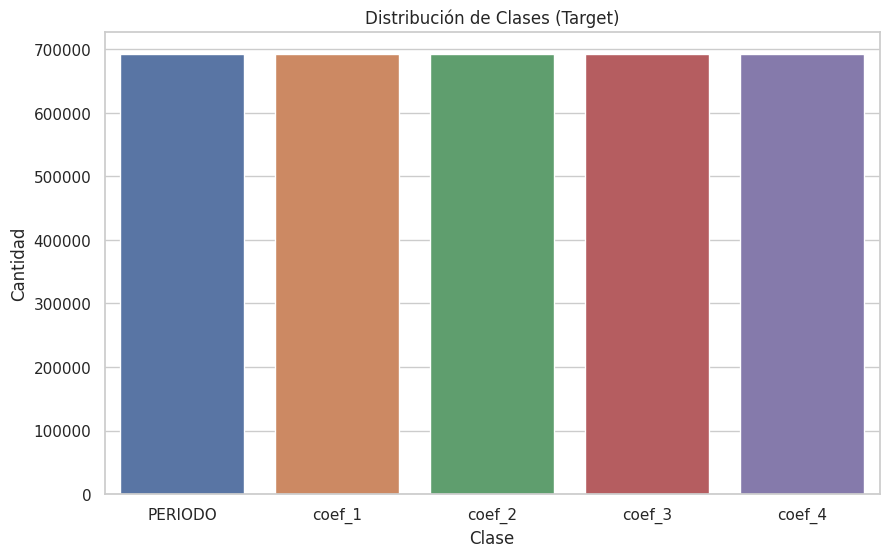

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de gráficas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar datos
data_train = pd.read_csv("/content/train.csv", index_col="ID")

# 1. Distribución de clases
sns.countplot(data=data_train)
plt.title("Distribución de Clases (Target)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()